# Setup

In [1]:
!pip install sox
!pip install numpy

In [2]:
import glob
import sox
import json
import numpy as np
import os
from pathlib import Path

import matplotlib.pyplot as plt
import torch
from lhotse import LilcomFilesWriter

from lhotse.features import Fbank, FeatureSetBuilder
from lhotse.cut import CutSet, SupervisionSet
from lhotse.dataset.sampling import SingleCutSampler
from lhotse.dataset.vad import VadDataset

from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

In [2]:
# input data directory with wav and json files
input_data_dir = os.getcwd() + '/data/vad_data/'
sample_rate = 16000

# Checks and statistics

### Check if:

- the sampling rate is the same for all audio files,
- all wav files have a corresponding json file,
- the structure of json files is consistent

### Statistics:

- total duration of the dataset,
- min, max, mean, median, variance, standard deviation,

In [4]:
seconds_all_files = []
file_found = False
for f_wav in glob.glob(input_data_dir + "*.wav"):
    for f_json in glob.glob(input_data_dir + "*.json"):
        data = json.load(open(f_json))
        if not data["speech_segments"]:
            print("Something might be wrong with file {}.".format(f_json))
        if f_wav.strip(".wav") == f_json.strip(".json"):
            file_found = True
            break
    if not file_found: 
        print("A json file is missing for {}.".format(f_wav))

    seconds = sox.file_info.duration(f_wav)
    seconds_all_files.append(seconds)
    assert sox.file_info.sample_rate(f_wav) == sample_rate

In [5]:
total_dur = np.sum(seconds_all_files)
min_val = np.min(seconds_all_files)
max_val = np.max(seconds_all_files)
mean_val = np.mean(seconds_all_files)
median_val = np.median(seconds_all_files)
var_val = np.var(seconds_all_files)
std_val = np.std(seconds_all_files)

print('Total duration of the dataset is {dur} hours.'.format(dur=round(total_dur/60/60, 2)))
print('Min duration is {min} seconds, max duration is {max} seconds.'.format(min=round(min_val, 1), max=round(max_val, 1)))
print('Mean and median values are {mean} seconds and {median} seconds.'.format(mean=round(mean_val, 1), median=round(median_val, 1)))
print('Variance and standard deviation are {var} seconds and {std} seconds.'.format(var=round(var_val, 1), std=round(std_val,1)))

Total duration of the dataset is 3.28 hours.
Min duration is 1.4 seconds, max duration is 17.2 seconds.
Mean and median values are 12.3 seconds and 13.9 seconds.
Variance and standard deviation are 15.2 seconds and 3.9 seconds.


In [3]:
project_dir = "/Users/joannarownicka/software/vad"
os.chdir(project_dir)

root_dir = Path('evaluation/data')
corpus_dir = root_dir / 'vad_data/'
output_dir = root_dir / 'vad_data_nb/'

In [5]:
from preprocessing import prepare_vad_dataset
vad_manifests = prepare_vad_dataset.prepare_vad_dataset(corpus_dir, output_dir)

In [22]:
cuts = CutSet.from_manifests(
    recordings=vad_manifests['recordings'],
    supervisions=vad_manifests['supervisions']
).compute_and_store_features(
    extractor=Fbank(),
    storage_path=f'{output_dir}/feats',
    storage_type=LilcomFilesWriter,
)

cuts.to_json(output_dir / 'cuts.json.gz')

NameError: name 'vad_manifests' is not defined

In [12]:
cuts = CutSet.from_json(output_dir / 'cuts.json.gz')
vad_dataset = VadDataset()
sampler = SingleCutSampler(cuts.cut_into_windows(10.0, keep_excessive_supervisions=True), shuffle=False, max_cuts=4)
cut_ids = next(iter(sampler))

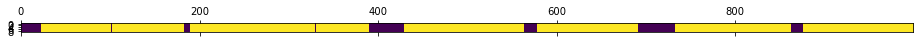

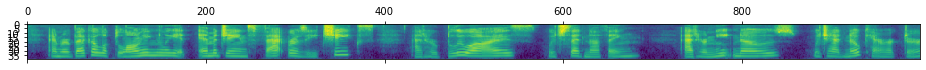

In [13]:
sample = vad_dataset[cut_ids]

label_height = 10
vad_label = torch.stack([sample['is_voice'][0] for i in range(label_height)]).reshape(label_height, 1000)
plt.matshow(vad_label)
plt.matshow(sample['inputs'][0].transpose(0, 1).flip(0))

In [16]:
print(sample['is_voice'][0])
print(sample['inputs'][1].shape)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 